In [1]:
#Import Core Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-Learn Modules
from sklearn.datasets import load_iris # For loading the Iris dataset
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression # First Model
from sklearn.ensemble import RandomForestClassifier # Second Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # For evaluation metrics

In [ ]:
iris = load_iris() # Load the Iris dataset

# Create a Pandas dataframe from the dataset
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features/Individual Characteristics
y = pd.Series(iris.target) # Target/Species of Iris

# Target Names are useful for interpretation of results later
print("Target Names:", iris.target_names)

Target Names: ['setosa' 'versicolor' 'virginica']


In [13]:
print("Features (X) head:\n", X.head()) # Four Main Features: # Sepal Length, Sepal Width, Petal Length, Petal Width
print("\nTarget (y) value counts:\n", y.value_counts()) # Setosa, Versicolor, Virginica each with 50 samples
print("\n Features (X) description:\n", X.describe()) # Summary statistics of the features
print("\n Features (X) info:\n")
X.info() # Information about the features dataframe

Features (X) head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) value counts:
 0    50
1    50
2    50
Name: count, dtype: int64

 Features (X) description:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000    

In [ ]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
# stratify = y ensures that the class distribution is preserved in both sets (prevents class imbalances)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShapes after splitting:")
print("X_train shape:", X_train.shape) # 120 samples for training, each with 4 features
print("y_train shape:", y_train.shape) # 120 samples for training, each with a target label (0, 1, or 2, which is the species of Iris)
print("X_test shape:", X_test.shape) # 30 samples for testing, each with 4 features
print("y_test shape:", y_test.shape) # 30 samples for testing, each with a target label (0, 1, or 2, which is the species of Iris)

print("\ny_train value counts:\n", y_train.value_counts())
print("\ny_test value counts:\n", y_test.value_counts())


Shapes after splitting:
X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)

y_train value counts:
 0    40
2    40
1    40
Name: count, dtype: int64

y_test value counts:
 0    10
2    10
1    10
Name: count, dtype: int64


In [15]:
# Initialize and train the first model: Logistic Regression
# max_iter=200 ensures the model has enough iterations to converge (to find the best solution)
log_reg_model = LogisticRegression(max_iter=200, random_state=42)

In [16]:
print("\nTraining Logistic Regression model...")
log_reg_model.fit(X_train, y_train) # Fit the model to the training data
print("Logistic Regression model trained successfully.")


Training Logistic Regression model...
Logistic Regression model trained successfully.


In [17]:
# Predict class labels for the test set
y_pred_lr = log_reg_model.predict(X_test)

# Predict the probabilities for each class
y_prob_lr = log_reg_model.predict_proba(X_test)

print("\nFirst Five Logistic Regression Predictions:", y_pred_lr[:5]) # Display the first five predictions
print("\nFirst Five Actual Values:", y_test.values[:5]) # Display the first five actual values


First Five Logistic Regression Predictions: [0 2 1 1 0]

First Five Actual Values: [0 2 1 1 0]


In [18]:
accuracy_lr = accuracy_score(y_test, y_pred_lr) # Calculate accuracy of the Logistic Regression model
print(f"\nLogistic Regression Model Accuracy: {accuracy_lr:.4f}") # Print the accuracy


Logistic Regression Model Accuracy: 0.9667



Confusion Matrix for Logistic Regression:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


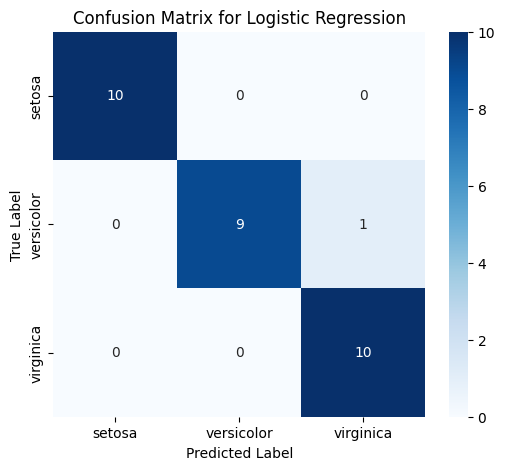

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr) # Compute confusion matrix
print("\nConfusion Matrix for Logistic Regression:\n", conf_matrix_lr) # Display the confusion matrix

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names) # annot diplays the values in the cells, fmt='d' formats them as integers, cmap='Blues' sets the color map to blue, xticklabels and yticklabels set the labels for the axes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [20]:
class_report_lr = classification_report(y_test, y_pred_lr, target_names=iris.target_names) # Generate a classification report
print("\nClassification Report for Logistic Regression:\n", class_report_lr) # Display the classification report


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [44]:
# Now we train the second model: Random Forest Classifier
rf_model= RandomForestClassifier(random_state=42, n_estimators=200) # Initialize the Random Forest model 

In [45]:
rf_model.fit(X_train, y_train) # Fit the model to the training data

RandomForestClassifier(n_estimators=200, random_state=42)

In [46]:
y_pred_rf = rf_model.predict(X_test) # Predict class labels for the test set
y_prob_rf = rf_model.predict_proba(X_test) # Predict the probabilities for each class

print("\nFirst Five Random Forest Predictions:", y_pred_rf[:5]) # Display the first five predictions
print("\nFirst Five Actual Values:", y_test.values[:5]) # Display the first five actual values


First Five Random Forest Predictions: [0 2 1 1 0]

First Five Actual Values: [0 2 1 1 0]


In [47]:
accuracy_rf = accuracy_score(y_test, y_pred_rf) # Calculate accuracy of the Random Forest model
print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}") # Print the accuracy


Random Forest Model Accuracy: 0.9000



Confusion Matrix for Random Forest:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


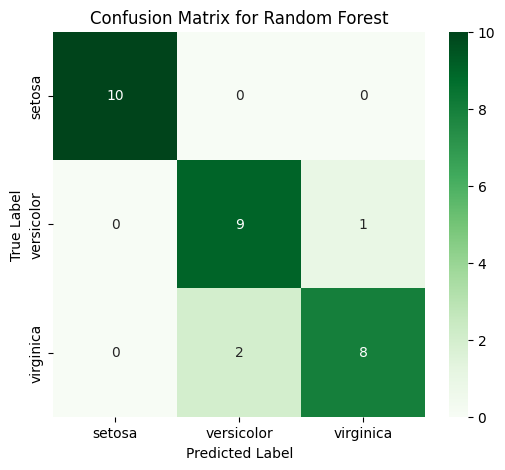

In [48]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) # Compute confusion matrix
print("\nConfusion Matrix for Random Forest:\n", conf_matrix_rf) # Display the confusion matrix

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names) # annot diplays the values in the cells, fmt='d' formats them as integers, cmap='Greens' sets the color map to green, xticklabels and yticklabels set the labels for the axes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [49]:
class_report_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names) # Generate a classification report
print("\nClassification Report for Random Forest:\n", class_report_rf) # Display the classification report
                                                                                


Classification Report for Random Forest:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# Compare the two models
print("\nComparison of Model Accuracies:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")




Comparison of Model Accuracies:
Logistic Regression Accuracy: 0.9667
Random Forest Accuracy: 0.9000
